We start by setting up our environment. To run this notebook, we will need:

- RocketPy
- netCDF4 (to get weather forecasts)
- Data files (we will clone RocketPy's repository for these)

Therefore, let's run the following lines of code:


In [ ]:
!git clone https://github.com/giovaniceotto/RocketPy.git
import os

Cloning into 'RocketPy'...
remote: Enumerating objects: 14858, done.
remote: Counting objects: 100% (3194/3194), done.
remote: Compressing objects: 100% (785/785), done.
remote: Total 14858 (delta 2574), reused 2847 (delta 2404), pack-reused 11664
Receiving objects: 100% (14858/14858), 757.06 MiB | 20.96 MiB/s, done.
Resolving deltas: 100% (10518/10518), done.
Updating files: 100% (338/338), done.


In [ ]:
!pip install --upgrade cffi
!pip install rocketpy --pre netCDF4

import sys

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.0 MB/s eta 0:00:00
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65861 sha256=f38e99154764be7275d13cfbb31586d8eaa724626cba6c0aa959d92395b20a8d
  Stored in directory: /root/.cache/pip/wheels/16/7c/e6/621a95f24bd1ff987368f1c37881ffe013433ff6b413d87fcb
Successfully built simplekml


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#get_ipython().run_line_magic('matplotlib', 'widget')

In [ ]:
pip install rocketcea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.5/38.5 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rocketcea: filename=rocketcea-1.1.34-cp310-cp310-linux_x86_64.whl size=5294377 sha256=cda9bc1db3f8434687f17ed7227e886e997c6afa46142ef79b7872f6b55cccce
  Stored in directory: /root/.cache/pip/wheels/0a/c6/78/09f751e0e6185bac68940ca41d7ce5038ccd506209a8339781
Successfully built rocketcea


In [ ]:
pip install numpy

In [ ]:
pip install numpy matplotlib

In [ ]:
pip install jsonpickle

In [ ]:
pip install windrose

In [ ]:
pip install simplekml

In [ ]:
!pip install --upgrade cffi

In [ ]:
pip install --upgrade rocketpy

In [ ]:
pip install timezonefinder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 14.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
  Created wheel for timezonefinder: filename=timezonefinder-6.2.0-cp310-cp310-manylinux_2_35_x86_64.whl size=46900634 sha256=6c43cdda2616582dbdf8099bf243e86e411bcfb2b6d418f90f8cac03b39067ac
  Stored in directory: /root/.cache/pip/wheels/17/19/d4/ae94459b7f74f7e8f171862d1c08adedf9b7c76ddfc514a620
Successfully built timezonefinder


In [ ]:
from datetime import datetime
from time import process_time, perf_counter, time
import glob

from rocketpy import rocket, motors, simulation, environment, mathutils
from rocketpy.rocket import rocket
from rocketpy.motors import liquid_motor, tank, tank_geometry, fluid
from rocketpy.simulation import flight
from rocketpy.environment import environment
from rocketpy.mathutils import function

import numpy as np
from numpy.random import normal, uniform, choice
from IPython.display import display

If you are using Jupyter Notebooks, it is recommended to run the following line to make matplotlib plots which will be shown later interactive and higher quality.


In [ ]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams["figure.figsize"] = [8, 5]
mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["font.size"] = 14
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["figure.titlesize"] = 14

## Setting Up Thrust Curve


In [ ]:
import rocketcea
import os
import numpy as np
import scipy
from scipy.optimize import minimize
import tkinter as tk
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.matplotlib_fname())
from rocketcea.cea_obj import CEA_Obj
import pandas as pd
import math
import datetime

class propellant:
    def __init__(self,name, density, viscosity,tank_length, tank_radius, temperature):
        self.density = density
        self.viscosity = viscosity
        self.temp = temperature
        self.rad = tank_radius
        self.length = tank_length
        self.name = name
        return None
    def __str__(self) -> str:
        return self.name

/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
#matplotlib widget

<ipython-input-18-a52e5ce51728>:60: RuntimeWarning: invalid value encountered in double_scalars
  mdot_eth = ((1/R_eth)*rho_ETH*(P_ethtank - Pc_test[i]))**(1/2)


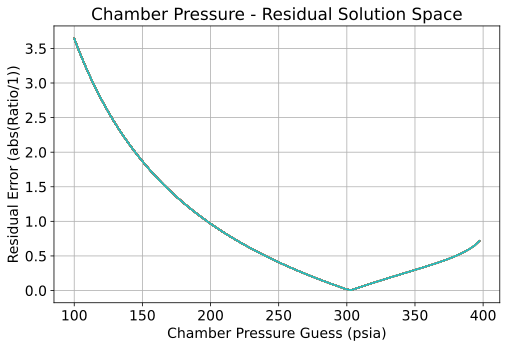

In [ ]:
#Fluid Properties (SI units)
rho_LOX = 1140.0
rho_ETH = 798.0

#System Test Data Results
CdA_inj_LOX = 0.000008979 #Test For Cd
CdA_inj_ETH = 0.00001331 #Test For Cd

CdA_feed_LOX = 0.000040 #Test For Cd NEEDS DATA
CdA_feed_ETH = 0.00004046 #Test For Cd

#Hydraulic Resistance Terms
R_ox_inj = 1/(2*(CdA_inj_LOX**2)) #dP=Rhyd*mdot^2/rho
R_eth_inj = 1/(2*(CdA_inj_ETH**2)) #dP=Rhyd*mdot^2/rho

R_ox_feed = 1/(2*(CdA_feed_LOX**2)) #dP=Rhyd*mdot^2/rho
R_eth_feed = 1/(2*(CdA_feed_ETH**2)) #dP=Rhyd*mdot^2/rho

R_ox = R_ox_inj + R_ox_feed #Equivalent Hydraulic System Resistance
R_eth = R_eth_inj + R_ox_feed #Equivalent Hydraulic System Resistance

#Tank Properties
gamma_tanks = 1.41 #1.41=GN2, 1.67=GHe
V_oxtank = 6.926 #L
V_ethtank = 7.57 #L

V_oxinit = 3.50 #L OPTMIMIZE THIS
V_ethinit = 2.250 #L OPTIMIZE THIS

V_oxgas = V_oxtank-V_oxinit
V_ethgas = V_ethtank - V_ethinit

#Initial Tank Pressures
P_tank_ox_psi = 460.0 #psia
P_oxtank = P_tank_ox_psi*6895 #Pa

P_tank_eth_psi = 400.0 #psia
P_ethtank = P_tank_eth_psi*6895 #Pa

#define cstar efficiency: completeion of energy release. See RPE Pg64
Efficiency = 0.91
chamber = CEA_Obj(propName="", oxName="LOX", fuelName="C2H5OH") #initializs CEA object

#define Throat Diameter, Area
Dt = 27.54/1000 #m
At = (Dt**2)/4*math.pi

# Initialize Array
Residual = []

#create Chamber Pressure Guess Array
Pc_test_psi = np.linspace(100.0, (max(P_tank_ox_psi, P_tank_eth_psi)-1), 100) #psia
Pc_test = Pc_test_psi*6895 #Pa

#solve residual for each pressure guess
for i in range(len(Pc_test)):

    #solve mass flow from fluid resistances
    mdot_ox = ((1/R_ox)*rho_LOX*(P_oxtank - Pc_test[i]))**(1/2)
    mdot_eth = ((1/R_eth)*rho_ETH*(P_ethtank - Pc_test[i]))**(1/2)
    mdot_fluid = mdot_ox + mdot_eth
    #get OF ratio
    OF_ratio_test = mdot_ox/mdot_eth

    #solve mass flow from CEA
    Cstar_fps = chamber.get_Cstar(Pc=Pc_test_psi[i], MR=OF_ratio_test) #see RPE pg64
    Cstar = Cstar_fps*0.3048 #m
    mdot_CEA = Pc_test[i]*At/(Cstar*Efficiency) #kg/s

    #compare residual, append to array
    error = (mdot_CEA-mdot_fluid)/mdot_CEA
    Residual.append(abs(error))

    plt.plot(Pc_test_psi[:i+1], Residual[:i+1])
    plt.xlabel('Chamber Pressure Guess (psia)')
    plt.ylabel('Residual Error (abs(Ratio/1))')
    plt.title('Chamber Pressure - Residual Solution Space')
    plt.grid(True)


# Display the final plot after the loop
plt.show()

def Calculate_Residual(Pc, P_oxtank, P_ethtank):
    #solve mass flow from fluid resistances
    mdot_ox = ((1/R_ox)*rho_LOX*(P_oxtank - (Pc*6895)))**(1/2)
    mdot_eth = ((1/R_eth)*rho_ETH*(P_ethtank - (Pc*6895)))**(1/2)
    mdot_fluid = mdot_ox + mdot_eth
    #get OF ratio
    OF_ratio = mdot_ox/mdot_eth
    #solve mass flow from CEA
    Cstar_fps = chamber.get_Cstar(Pc = Pc[0], MR = OF_ratio[0]) #see RPE pg64
    Cstar = float(Cstar_fps*0.3048) #m/s
    if Cstar == 0:
        print("CSTAR ZERO")
        print(f"PC = {Pc[0]}")
        mdot_CEA_res = Pc*6895*At/(abs(Cstar)*Efficiency)
    else:
        mdot_CEA_res = (Pc*6895)*At/(Cstar*Efficiency) #kg/s

    #compare residual, append to array
    error = (mdot_CEA_res-mdot_fluid)/mdot_CEA_res

    global OF_ratio_glob
    OF_ratio_glob = float(OF_ratio[0])

    global mdot_total_glob
    mdot_total_glob = float(mdot_fluid[0])

    if OF_ratio > 2.5: #tank pressure drop eqs breaking
        error = 500

    return abs(error)

def GradientDescent(guess, P_oxtank, P_ethtank):
    # Use scipy optimize minimize with residual function to find Chamber Pressure
    result = minimize(
        Calculate_Residual,
        guess,
        args = (P_oxtank, P_ethtank),
        bounds = [(100, min([P_oxtank/6895, P_ethtank/6895]))],
    )
    P_chamber = result.x[0]
    # t = type(P_chamber)
    #print(f"Pchamb TYPE {t}")
    OF = OF_ratio_glob
    isp = chamber.estimate_Ambient_Isp(Pc=P_chamber,MR=OF,eps=4.35)[0]
    thrust = 9.8*isp*(mdot_total_glob)/1000 #kN
    print(f"Thrust {thrust}")
    massflow_total = mdot_total_glob
    print(f"massflow {massflow_total}")
    #print(f"PC {P_chamber/6895} and MR {OF_ratio} at {i*dt}")

    return P_chamber, thrust, OF, massflow_total

TIMESTEP 0.08032128514056225
Thrust 1.906631590018778
massflow 0.8500868840193869
CSTAR ZERO
PC = 395.6240469567379
CSTAR ZERO
PC = 395.6240469567379
CSTAR ZERO
PC = 395.6240469567379
Thrust 1.886274270956266
massflow 0.842611296740192
CSTAR ZERO
PC = 389.04953052972047
CSTAR ZERO
PC = 389.04953052972047


<ipython-input-18-a52e5ce51728>:90: RuntimeWarning: divide by zero encountered in divide
  OF_ratio = mdot_ox/mdot_eth
<ipython-input-18-a52e5ce51728>:97: RuntimeWarning: divide by zero encountered in divide
  mdot_CEA_res = Pc*6895*At/(abs(Cstar)*Efficiency)
<ipython-input-18-a52e5ce51728>:102: RuntimeWarning: invalid value encountered in divide
  error = (mdot_CEA_res-mdot_fluid)/mdot_CEA_res


Thrust 1.865108139327532
massflow 0.8312056551638642
Thrust 1.8444616574557988
massflow 0.820214704582038
CSTAR ZERO
PC = 376.7349836950226
Thrust 1.8243154351644764
massflow 0.8096169796094861
CSTAR ZERO
PC = 370.9595691310746
Thrust 1.804652267154324
massflow 0.7993919422198543
CSTAR ZERO
PC = 365.4175461652004
CSTAR ZERO
PC = 365.4175461652004
Thrust 1.7854545088442764
massflow 0.789520981252589
CSTAR ZERO
PC = 360.0946193780731
CSTAR ZERO
PC = 360.0946193780731
CSTAR ZERO
PC = 360.0946193780731
Thrust 1.7667142909006521
massflow 0.7799863437957744
CSTAR ZERO
PC = 354.9776201978294
CSTAR ZERO
PC = 354.9776201978294
Thrust 1.7483999642467953
massflow 0.770771403531306
CSTAR ZERO
PC = 350.0543999030056
CSTAR ZERO
PC = 350.0543999030056
Thrust 1.7305048374214136
massflow 0.7618607013777247
CSTAR ZERO
PC = 345.31373339438267
CSTAR ZERO
PC = 345.31373339438267
Thrust 1.7130149042214682
massflow 0.7532396677098869
CSTAR ZERO
PC = 340.74523501419816
CSTAR ZERO
PC = 340.74523501419816
Thrus

<ipython-input-18-a52e5ce51728>:87: RuntimeWarning: invalid value encountered in sqrt
  mdot_eth = ((1/R_eth)*rho_ETH*(P_ethtank - (Pc*6895)))**(1/2)


Thrust 1.51702900010927
massflow 0.6622544777120394
CSTAR ZERO
PC = 293.43842530390674
CSTAR ZERO
PC = 293.43842529390673
Thrust 1.5040085413623692
massflow 0.6565523522790245
CSTAR ZERO
PC = 290.51924961296197
CSTAR ZERO
PC = 290.51924960296196
Thrust 1.4912378971720608
massflow 0.6509981581911864
CSTAR ZERO
PC = 287.6800455079079
Thrust 1.4787096809795217
massflow 0.6455858602234941
CSTAR ZERO
PC = 284.9173147112499
CSTAR ZERO
PC = 284.9173147112499
Thrust 1.466416775492443
massflow 0.6403097268628378
CSTAR ZERO
PC = 282.2277624783629
Thrust 1.4543519770031872
massflow 0.6351644226563431
CSTAR ZERO
PC = 279.6082825582316
CSTAR ZERO
PC = 279.6082825582316
Thrust 1.4425088416810052
massflow 0.6301447037069049
CSTAR ZERO
PC = 277.0559450856654
CSTAR ZERO
PC = 277.0559450856654
CSTAR ZERO
PC = 277.0559450856654
Thrust 1.4308809754387617
massflow 0.6252456405901838
CSTAR ZERO
PC = 274.56798404609793
CSTAR ZERO
PC = 274.56798404609793
CSTAR ZERO
PC = 274.56798404609793
Thrust 1.41946207458

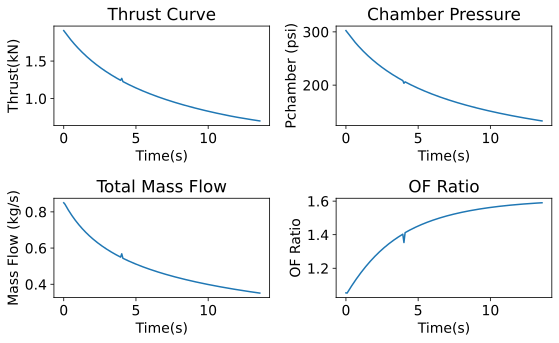

In [ ]:
#reference thrust curve
iterations = 250
time = np.linspace(0, 20, iterations) #200 pts from 0 to 15 seconds
dt = float(time[1]-time[0])
print(f"TIMESTEP {dt}")
OF_array = []
Thrust_array = []
P_chamber_array = []
mdtot_array = []
fin = 0
for i in range(len(time)): #perform this for every timestep in the profile

    if i == 0:
        Pc_guess = 375
    else:
        Pc_guess = P_chamber_last-5

    P_chamber, Thrust, OF, md_tot = GradientDescent(Pc_guess, P_oxtank, P_ethtank)
    md_ox = md_tot/(
        1+1/OF)
    md_eth = md_tot-md_ox

    #print(f"Timestep {dt}")
    masslost_ox = md_ox*dt
    masslost_eth = md_eth*dt
    #print(f"masslostox {masslost_ox}")

    #print(f"Voxgas(L) {V_oxgas}")
    V_oxgas_next = V_oxgas + (masslost_ox/(rho_LOX*0.001))
    V_ethgas_next = V_ethgas + (masslost_eth/(rho_ETH*0.001))
    #print(f"Voxgasnext(L) {V_oxgas_next}")

    P_oxtank = P_oxtank*((V_oxgas/V_oxgas_next)**gamma_tanks)
    P_ethtank = P_ethtank*((V_ethgas/V_ethgas_next)**gamma_tanks)
    # print(f"Oxtank = {P_oxtank/6895}[psi] ... Ethtank = {P_ethtank/6895}[psi] at {i*dt}")

    V_oxgas = V_oxgas_next
    V_ethgas = V_oxgas_next

    mdtot_array.append(md_tot)
    OF_array.append(OF)
    Thrust_array.append(Thrust)
    P_chamber_array.append(P_chamber)
    assert len(Thrust_array) == len(P_chamber_array)
    P_chamber_last = P_chamber

    if P_chamber>(0.90*P_oxtank/6895) or P_chamber>(0.90*P_oxtank/6895):
        OxDrop = (P_oxtank/6895)/P_chamber
        ETHDrop = (P_ethtank/6895)/P_chamber
        print(f"Flow Stability Violated with {OxDrop}% LOXratio and {ETHDrop}% ETHratio")
        break

    if V_oxgas>=(V_oxtank-V_oxtank/500) or V_ethgas>=(V_ethtank-V_ethtank/500):
        oxrem = V_oxtank-V_oxgas
        ethrem = V_ethtank-V_ethgas
        print(f"Burn finished with {oxrem}L LOX and {ethrem}L ETH at Time {i*dt}s")
        break

# Create the subplots and plot the data
fig, axs = plt.subplots(2, 2)
sc = axs[0, 0].plot(time[0:len(Thrust_array)], Thrust_array)
axs[0, 0].set_title("Thrust Curve")
axs[0, 0].set_xlabel("Time(s)")
axs[0, 0].set_ylabel("Thrust(kN)")

axs[0, 1].plot(time[0:len(Thrust_array)], P_chamber_array)
axs[0, 1].set_title("Chamber Pressure")
axs[0, 1].set_xlabel("Time(s)")
axs[0, 1].set_ylabel("Pchamber (psi)")

axs[1, 0].plot(time[0:len(Thrust_array)], mdtot_array)
axs[1, 0].set_title("Total Mass Flow")
axs[1, 0].set_xlabel("Time(s)")
axs[1, 0].set_ylabel("Mass Flow (kg/s)")

axs[1, 1].plot(time[0:len(Thrust_array)], OF_array)
axs[1, 1].set_title("OF Ratio")
axs[1, 1].set_xlabel("Time(s)")
axs[1, 1].set_ylabel("OF Ratio")

# Adjust layout
plt.tight_layout()

# WRITE TO .ENG FILE
file_path = "../content/RocketPy/data/motors/LE2.eng"  # Specify the desired file path

if not os.path.exists(file_path):
    f = open(file_path, "x")
    f.close()

# Open the file for writing
with open(file_path, "w") as f:
    f.write("; ALULA - LE2 \n")
    f.write("; 10/7/2023 ver. \n")
    f.write("; created by UCB STAR \n")
    f.write("LE2 98 732 0 6.325 8.98822 ALULA\n")

    for i in range(len(Thrust_array)):
        f.write(f"{str(time[i])} {str(Thrust_array[i] * 1000)}\n")  # Thrust_array values in N

# Display the plots
%matplotlib inline
plt.show()

### Creating Environment

---




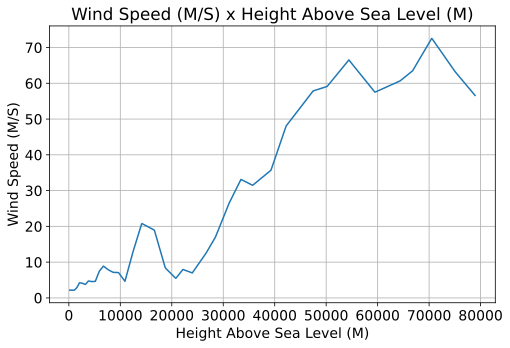

In [ ]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from rocketpy.environment import Environment
Env = Environment(
    latitude=32.9901,
    longitude=-106.9751,
    elevation=1400.556
)

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

Env.set_atmospheric_model(type='Forecast', file='GFS')

##Set custom wind speed
#Env.set_atmospheric_model(
 #   type="custom_atmosphere",
  #  pressure=None,
   # temperature=300,
    #wind_u=[(0, 7), (1000, 10)],
    #wind_v=[(0, 3), (500, 3), (1600, 2)],
#)

Env.wind_speed()


Gravity Details

Acceleration of Gravity at Lauch Site: 9.791112956972544 m/s²


Launch Site Details

Launch Date: 2023-10-16 12:00:00 UTC
Launch Site Latitude: 32.99010°
Launch Site Longitude: -106.97510°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315458.79 W    3651921.75 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.3 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.926 km
Forecast Time Period: From  2023-10-14 18:00:00  to  2023-10-30 18:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 2.74 m/s
Surface Wind Direction: 138.30°
Surface Wind Heading: 318.30°
Surface Pressure: 858.97 hPa
Surface Temperature: 289.53 K
Surface Air Density: 1.033 kg/m³
Surface Speed of Sound: 341.11 m/s


Atmospheric Model Plots



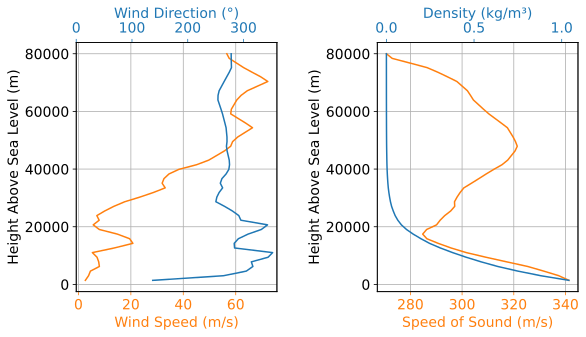

In [ ]:
Env.info()

### Creating Thrust Curve

---

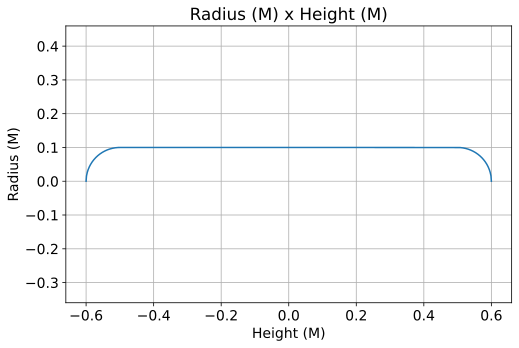

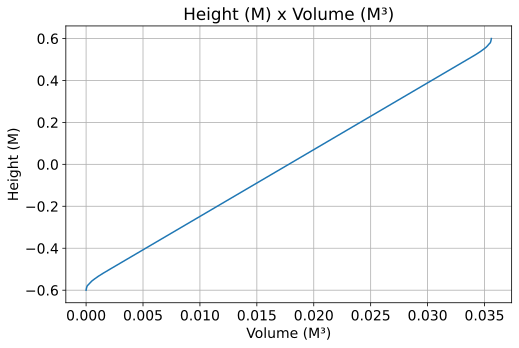

5.7855


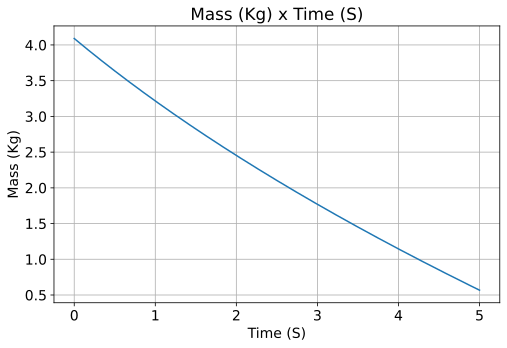

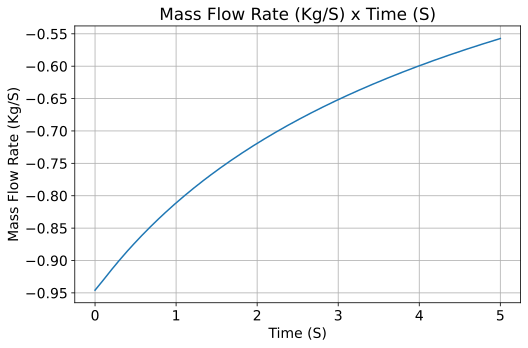

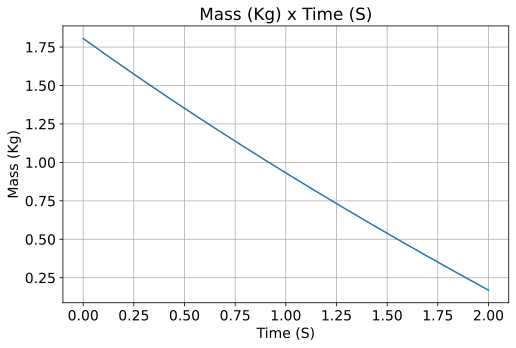

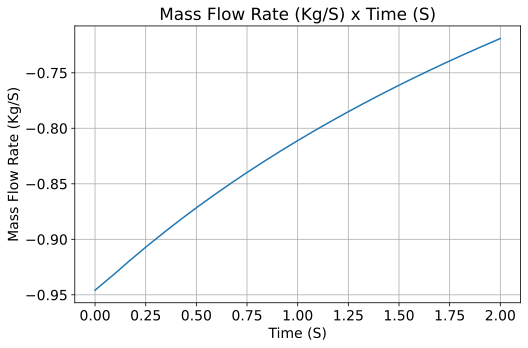

In [ ]:
from rocketpy.motors.liquid_motor import LiquidMotor
from rocketpy.motors import CylindricalTank, Fluid, TankGeometry
from rocketpy.motors.tank import MassFlowRateBasedTank

oxidizer_liq = Fluid(name="LOX_l", density=1140.0)
oxidizer_gas = Fluid(name="LOX_g", density=1.43)
fuel_liq = Fluid(name="ethanol_l", density=789)
fuel_gas = Fluid(name="ethanol_g", density=1.59)

tanks_shape = CylindricalTank(0.1, 1, True)
tanks_shape.radius.plot(equal_axis=True)
tanks_shape.inverse_volume.plot()

oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer tank",
    geometry=tanks_shape,
    flux_time=5,
    initial_liquid_mass=V_oxinit/1000*rho_LOX,
    initial_gas_mass=0.1,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out= "../content/RocketPy/data/motors/liquid_motor_example/LE2_mass_flow_out.csv", #####UPDATE
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
)

fuel_tank = MassFlowRateBasedTank(
    name="fuel tank",
    geometry=tanks_shape,
    flux_time=2, ######temp
    initial_liquid_mass=V_ethinit/1000*rho_ETH,
    initial_gas_mass=0.01,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out= "../content/RocketPy/data/motors/liquid_motor_example/LE2_mass_flow_out.csv", #####UPDATE
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=fuel_liq,
    gas=fuel_gas,
)

# Add the tank to the LiquidMotor

Propmass = V_oxinit/1000*rho_LOX+V_ethinit/1000*rho_ETH
print(Propmass)

LiquidMotor.propellant_initial_mass = Propmass

LE2 = LiquidMotor(
            thrust_source="../content/RocketPy/data/motors/LE2.eng",
            dry_mass=12.685,
            center_of_dry_mass_position=1.107,
            dry_inertia=(7.332,7.333,0.0318,-0.00153,0.0219,0.0284),
            nozzle_radius=0.0515/2,
           # burn_time,
            nozzle_position=0,
            reshape_thrust_curve=False,
            interpolation_method="linear",
            coordinate_system_orientation="nozzle_to_combustion_chamber",
)

# Add tanks to the LiquidMotor
LE2.add_tank(tank=oxidizer_tank, position=0.8) #distance from nozzle outlet
LE2.add_tank(tank=fuel_tank, position=1.86)

oxidizer_tank.fluid_mass.plot()
oxidizer_tank.net_mass_flow_rate.plot()

fuel_tank.fluid_mass.plot()
fuel_tank.net_mass_flow_rate.plot()

Nozzle Details
Nozzle Radius: 0.02575 m

Motor Details
Total Burning Time: 13.57429718875502 s
Total Propellant Mass: 5.785 kg
Average Propellant Exhaust Velocity: 1606.043 m/s
Average Thrust: 1087.023 N
Maximum Thrust: 1886.274270956266 N at 0.08032128514056225 s after ignition.
Total Impulse: 14755.578 Ns



/usr/local/lib/python3.10/dist-packages/rocketpy/mathutils/function.py:2232: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  ans, _ = integrate.quad(self, a, b, epsabs=0.001, limit=10000)


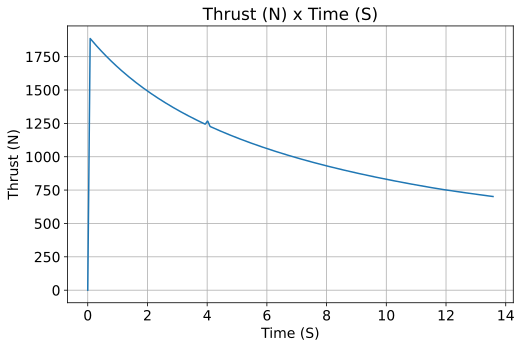

In [ ]:
LE2.info()

### Creating a Rocket

---

In [ ]:
from rocketpy.rocket.rocket import Rocket
ALULA = Rocket(
        #self,
        radius=0.0785,
        mass=36.338, #*0.9,     #  total dry
        inertia=(40.32089762,40.32707615,0.16968255,-0.00501791,-0.33114339,0.44168709),
        power_off_drag="../content/RocketPy/data/LE2_Inserts_Drag_-_Sheet1.csv", ##UPDATE
        power_on_drag="../content/RocketPy/data/LE2_Inserts_Drag_-_Sheet1.csv", ##UPDATE
        center_of_mass_without_motor=1.996,
        coordinate_system_orientation="tail_to_nose",
)

ALULA.add_motor(LE2, position=0) # origin = nozzle outlet


railButtons = ALULA.set_rail_buttons(
    upper_button_position=0.18,
    lower_button_position=-1.4246,
    angular_position=60,
)

NoseCone = ALULA.add_nose(length=0.762, kind="vonKarman", position=3.99)

FinSet = ALULA.add_trapezoidal_fins(
    n=3,
    root_chord =0.305,
    tip_chord=0.102,
    span=0.152,
    position=0.4,
    sweep_angle=33.7
)

To add the motor to our rocket we need only inform what motor we are adding (Pro75M1670) and inform the position, in meters, of the motor's nozzle exit area relative to the previously defined coordinate system.


In [ ]:
ALULA.info()


Inertia Details

Rocket Mass: 36.338 kg
Rocket Dry Mass: 49.023 kg (With Motor)
Rocket Mass: 54.919 kg (With Propellant)
Rocket Inertia (with motor, but without propellant) 11: 55.084 kg*m2
Rocket Inertia (with motor, but without propellant) 22: 55.091 kg*m2
Rocket Inertia (with motor, but without propellant) 33: 0.201 kg*m2
Rocket Inertia (with motor, but without propellant) 12: -0.007 kg*m2
Rocket Inertia (with motor, but without propellant) 13: -0.309 kg*m2
Rocket Inertia (with motor, but without propellant) 23: 0.470 kg*m2


Geometrical Parameters

Rocket Maximum Radius: 0.0785 m
Rocket Frontal Area: 0.019359 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass withour Motor: 0.230 m
Rocket Center of Dry Mass - Nozzle Exit Distance: 1.766 m
Rocket Center of Dry Mass - Center of Propellant Mass: 1.152 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.124 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coef

#### Adding Parachutes + Simulating flight
---


In [ ]:
main = ALULA.add_parachute(
    name="main", #84"d - 120"d
    cd_s=3.464577329*2.2, #^7.07050353*2.2,
    trigger=457.2,  # ejection altitude: 1000ft
    sampling_rate=105,
    lag=0, #1.5
    noise=(0, 8.3, 0.5),
)

drogue = ALULA.add_parachute(
    name="drogue", #60''d
    cd_s=1.767638271*2.2,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=0, #1.5
    noise=(0, 8.3, 0.5),
)

In [ ]:
from rocketpy.simulation.flight import Flight
test_flight = Flight(
  rocket=ALULA, environment=Env, rail_length=18.288, inclination=85, heading=0
)

## Analyzing the Results
---



Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1471.33 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: 2.05 m/s
Lateral Surface Wind Speed: 1.81 m/s


Launch Rail

Launch Rail Length: 18.288  m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 1.297 s
Rail Departure Velocity: 28.263 m/s
Rail Departure Static Margin: 3.912 c
Rail Departure Angle of Attack: 5.610°
Rail Departure Thrust-Weight Ratio: 3.122
Rail Departure Reynolds Number: 2.545e+05


Burn out State

Burn out time: 13.574 s
Altitude at burn out: 1302.950 m (AGL)
Rocket velocity at burn out: 147.035 m/s
Freestream velocity at burn out: 146.558 m/s
Mach Number at burn out: 0.433
Kinetic energy at burn ou

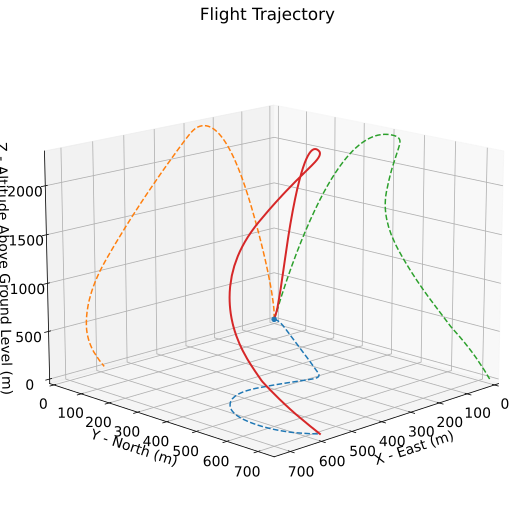



Trajectory Kinematic Plots



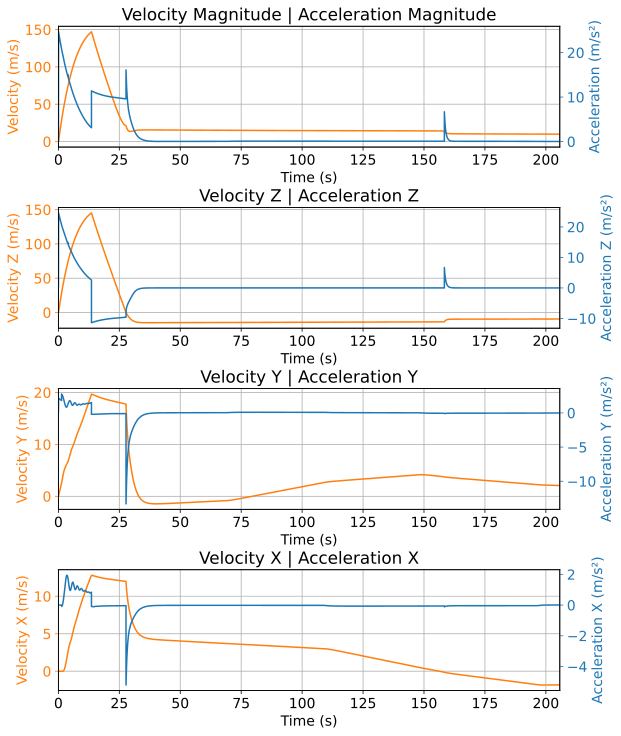



Angular Position Plots



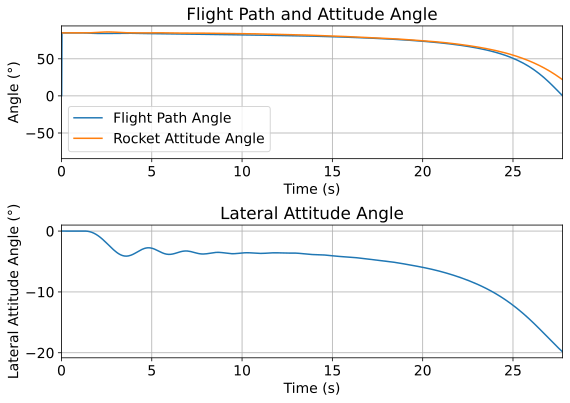



Path, Attitude and Lateral Attitude Angle plots



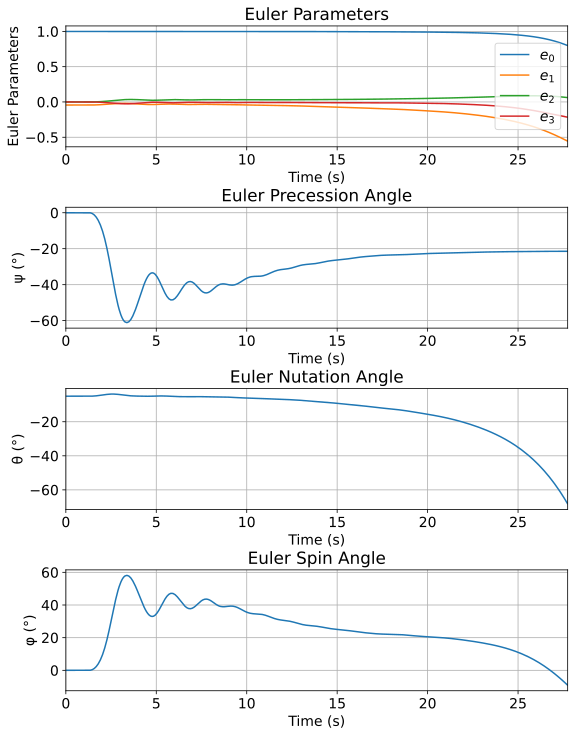



Trajectory Angular Velocity and Acceleration Plots



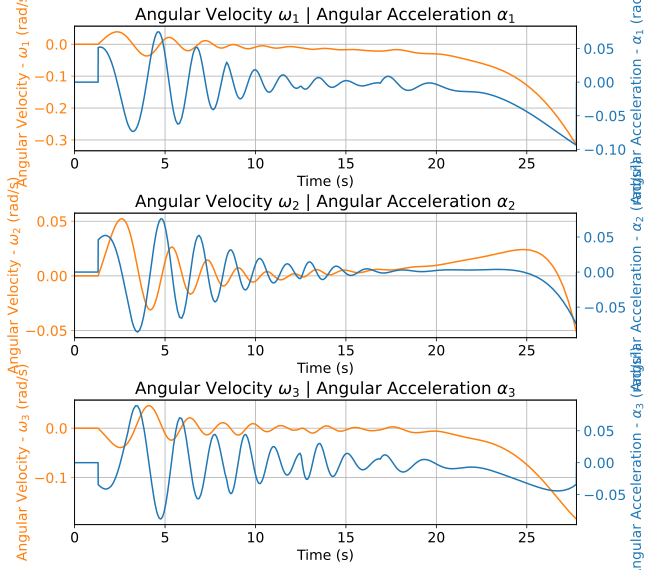



Aerodynamic Forces Plots



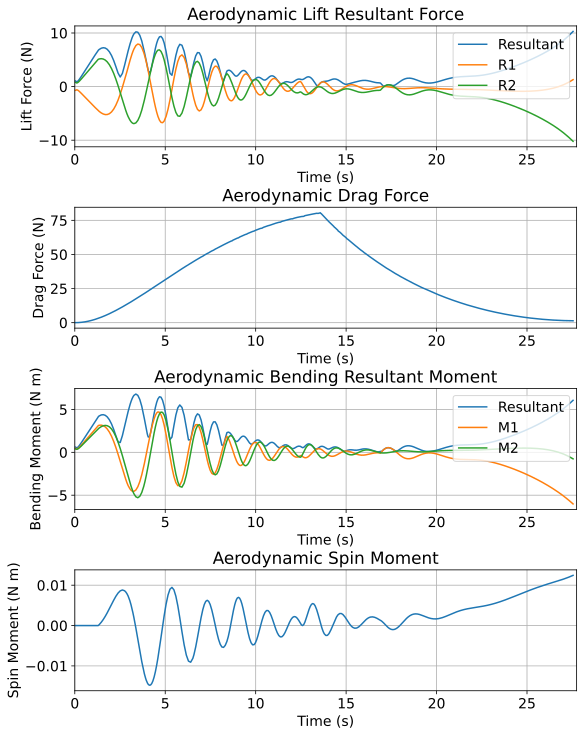



Rail Buttons Forces Plots



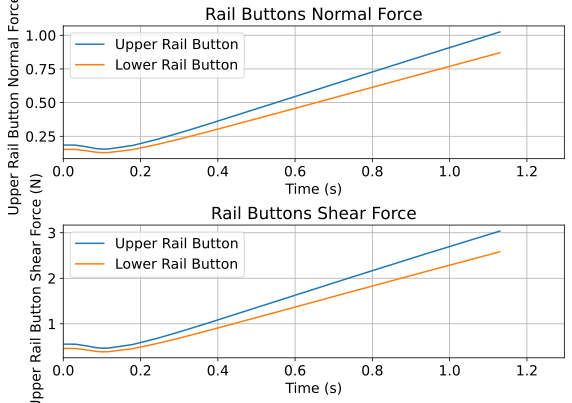



Trajectory Energy Plots



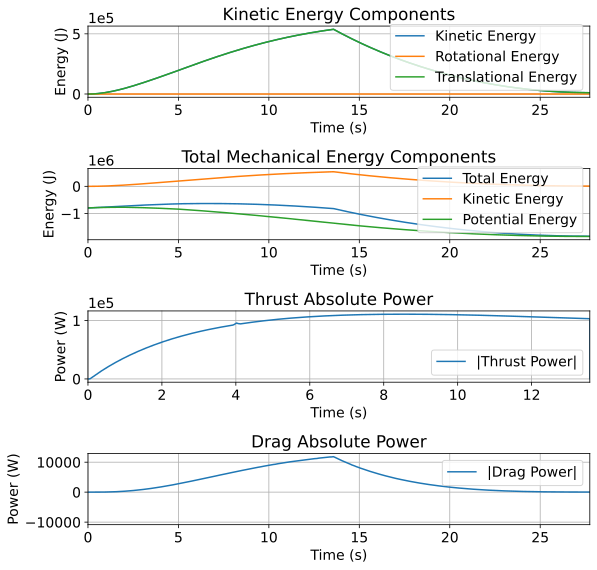



Trajectory Fluid Mechanics Plots



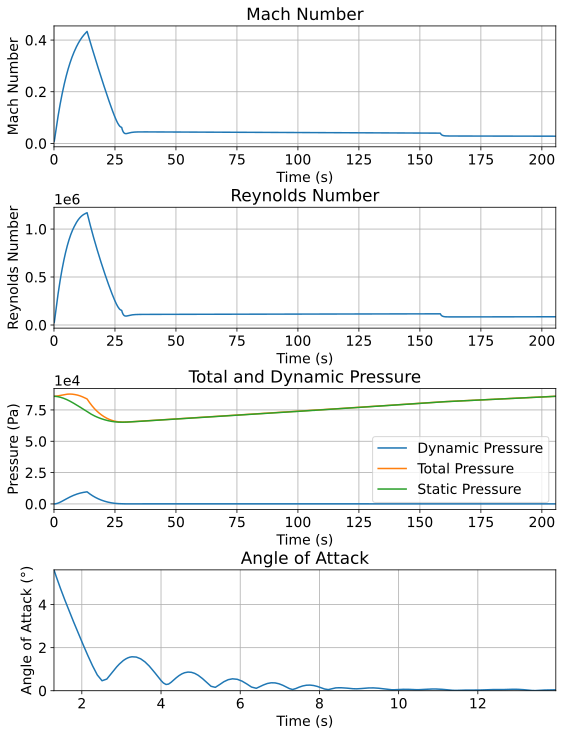



Trajectory Stability and Control Plots



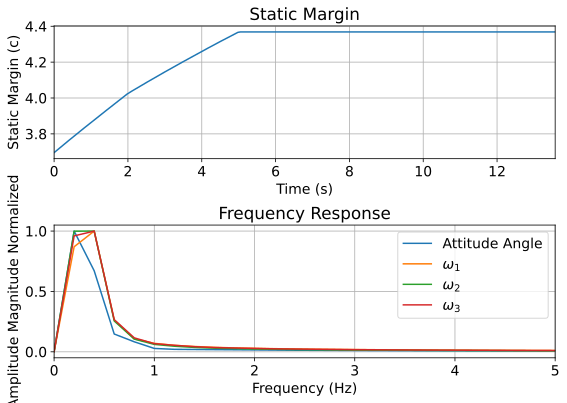



Rocket and Parachute Pressure Plots



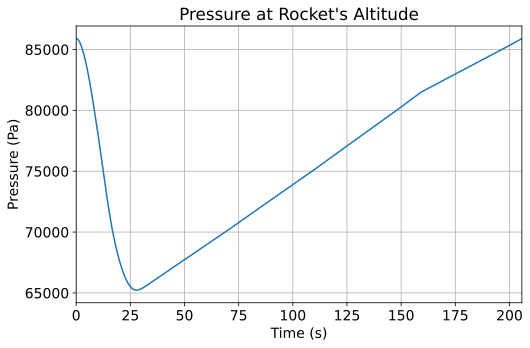


Parachute:  main


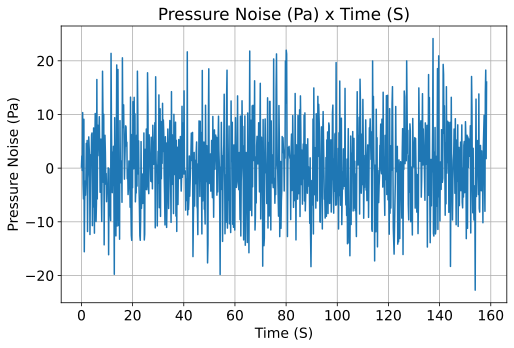

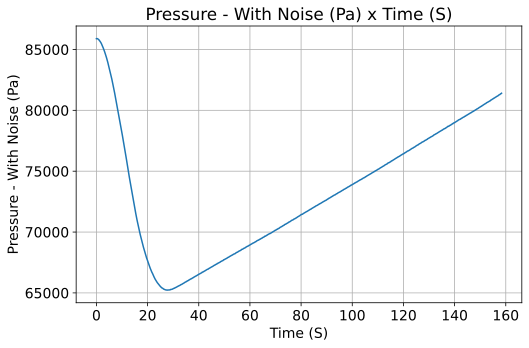

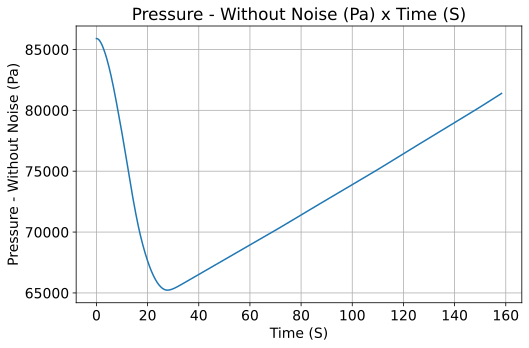


Parachute:  drogue


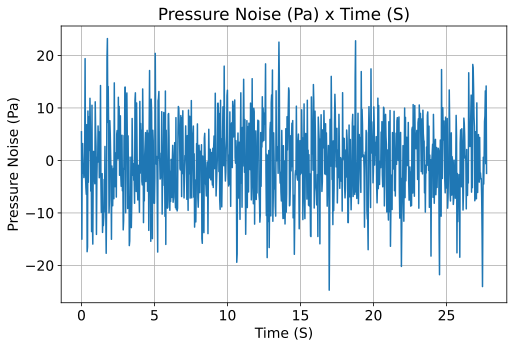

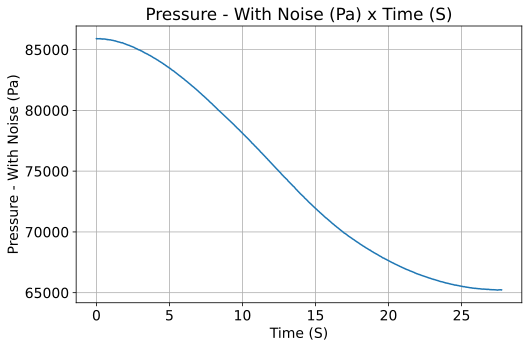

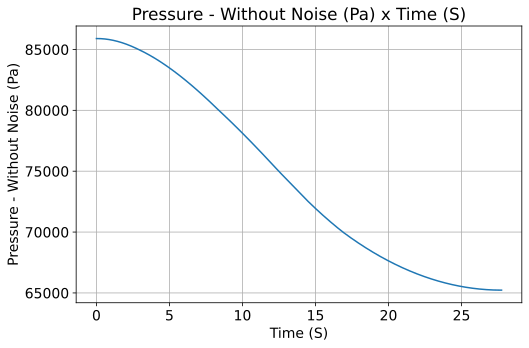

In [ ]:
test_flight.all_info()

Export Flight Trajectory to a .kml file so it can be opened on Google Earth


In [ ]:
test_flight.export_kml(
    file_name="trajectory.kml",
    extrude=True,
    altitude_mode="relative_to_ground",
)

File  trajectory.kml  saved with success!


### Apogee as a Function of Mass
---


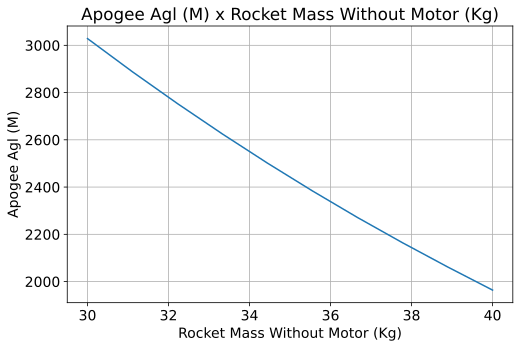

'Function from R1 to R1 : (Rocket Mass without motor (kg)) → (Apogee AGL (m))'

In [ ]:
from rocketpy.utilities import apogee_by_mass

apogee_by_mass(flight=test_flight, min_mass=30, max_mass=40, points=10, plot=True)

### Out of Rail Speed as a Function of Mass

 A common rule of thumb is that our rocket's out of rail speed should be 4 times the wind speed so that it does not stall and become unstable.


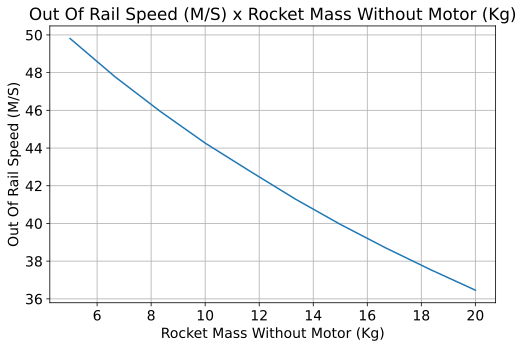

'Function from R1 to R1 : (Rocket Mass without motor (kg)) → (Out of Rail Speed (m/s))'

In [ ]:
from rocketpy.utilities import liftoff_speed_by_mass

liftoff_speed_by_mass(flight=test_flight, min_mass=5, max_mass=20, points=10, plot=True)

### Dynamic Stability Analysis

 Different static margins result in different dynamic behavior, which also depends on the rocket's rotational inertial. See how the dynamic stability of ALULA varies if we change the fins span by a certain factor.


Simulating Rocket with Static Margin of -0.769->0.086 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 0.506->1.361 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 1.781->2.636 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 3.056->3.911 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 4.332->5.186 c
Simulation Completed at Time: 5.0000 s


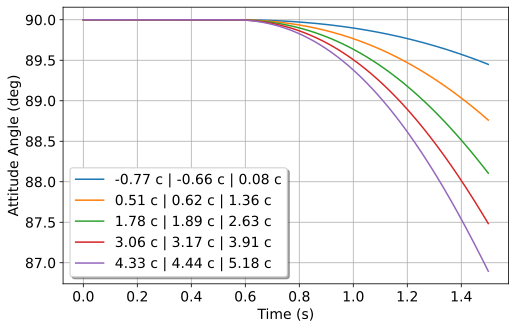

In [ ]:
# Helper class
from rocketpy import Function
import copy

# Prepare a copy of the rocket
ALULA2 = copy.deepcopy(ALULA)

# Prepare Environment Class
custom_env = Environment()
custom_env.set_atmospheric_model(type="custom_atmosphere", wind_v=-5)

# Simulate Different Static Margins by Varying Fin Position
simulation_results = []

for factor in [-0.5, -0.2, 0.1, 0.4, 0.7]:
    # Modify rocket fin set by removing previous one and adding new one
    ALULA2.aerodynamic_surfaces.pop(-1)

    fin_set = ALULA2.add_trapezoidal_fins(
        n=4,
        root_chord=0.120,
        tip_chord=0.040,
        span=0.100,
        position=-1.04956 * factor,
    )
    # Simulate
    print(
        "Simulating Rocket with Static Margin of {:1.3f}->{:1.3f} c".format(
            ALULA2.static_margin(0),
            ALULA2.static_margin(ALULA2.motor.burn_out_time),
        )
    )
    test_flight = Flight(
        rocket=ALULA2,
        environment=custom_env,
        rail_length=5.2,
        inclination=90,
        heading=0,
        max_time_step=0.01,
        max_time=5,
        terminate_on_apogee=True,
        verbose=True,
    )
    # Store Results
    static_margin_at_ignition = ALULA2.static_margin(0)
    static_margin_at_out_of_rail = ALULA2.static_margin(test_flight.out_of_rail_time)
    static_margin_at_steady_state = ALULA2.static_margin(test_flight.t_final)
    simulation_results += [
        (
            test_flight.attitude_angle,
            "{:1.2f} c | {:1.2f} c | {:1.2f} c".format(
                static_margin_at_ignition,
                static_margin_at_out_of_rail,
                static_margin_at_steady_state,
            ),
        )
    ]

Function.compare_plots(
    simulation_results,
    lower=0,
    upper=1.5,
    xlabel="Time (s)",
    ylabel="Attitude Angle (deg)",
)

### Characteristic Frequency Calculation

Here we analyse the characteristic frequency of oscillation of our rocket just as it leaves the launch rail. Note that when we ran test_flight.all_info(), one of the plots already showed us the frequency spectrum of our flight. Here, however, we have more control of what we are plotting.


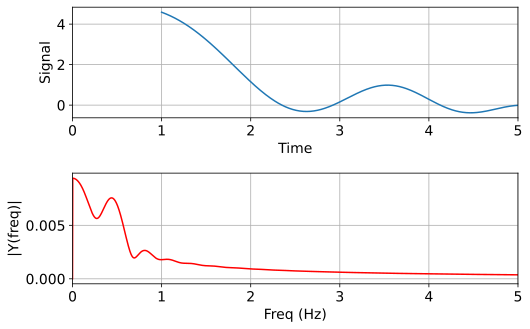

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate first 5 seconds of Flight
flight = Flight(
    rocket=ALULA,
    environment=Env,
    rail_length=5.2,
    inclination=90,
    heading=0,
    max_time_step=0.01,
    max_time=5,
)

# Perform a Fourier Analysis
Fs = 100.0
# sampling rate
Ts = 1.0 / Fs
# sampling interval
t = np.arange(1, 400, Ts)  # time vector
ff = 5
# frequency of the signal
y = flight.attitude_angle(t) - np.mean(flight.attitude_angle(t))
n = len(y)  # length of the signal
k = np.arange(n)
T = n / Fs
frq = k / T  # two sides frequency range
frq = frq[range(n // 2)]  # one side frequency range
Y = np.fft.fft(y) / n  # fft computing and normalization
Y = Y[range(n // 2)]

# Create the plot
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, y)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Signal")
ax[0].set_xlim((0, 5))
ax[0].grid()
ax[1].plot(frq, abs(Y), "r")  # plotting the spectrum
ax[1].set_xlabel("Freq (Hz)")
ax[1].set_ylabel("|Y(freq)|")
ax[1].set_xlim((0, 5))
ax[1].grid()
plt.subplots_adjust(hspace=0.5)
plt.show()